# Project: The IMDB Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. The aim of this report is to explore the dataset and draw some insights such as most popular movies, best-selling films, most profitable movies and curious facts about directors, genres and cast. 
> 
> The research questions that will be analyzed in this project are:
> 1) Are the best-selling movies also the most popular?

> 2) Do top-selling movies and most popular movies share the same director?

> 3) Which year had the most movie releases?

> 4) Which movies are the most profitable?

> 5) Do any of the directors with the most number of films also appear in the top-selling or most popular movie lists?

> 6) Is there a relationship between budget and popularity?

> 7) Which are the preferred movie genres?

> 8) Who are the actors or actresses that appear the most in this dataset films?

## Data Wrangling

In [1]:
#Load packages
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import and read input file
df = pd.read_csv (r'C:\Users\jlasa001\Documents\Data Analytics Learning Path - Udacity\Investigate a Dataset Project\tmdb-movies.csv')
print (df)

           id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...      

In [3]:
#Showing the structure of the dataset
df.shape

(10866, 21)

In [4]:
#Data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [26]:
#Checking for NA values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10866 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#Checking for duplicate values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
sum(df.duplicated())

1

In [7]:
#Pulling basic descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [36]:
#Looking at the first rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,0 0 0 0 Chris Prat...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,0 0 0 0 Chris Prat...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,0 0 0 0 Chris Prat...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,0 0 0 0 Chris Prat...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,0 0 0 0 Chris Prat...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [34]:
#Creating a function to calculate the median
def df_median(column):
    return df[column].median()

In [22]:
df_median('revenue_adj')

0.0

In [28]:
df_median('budget_adj')

0.0

In [29]:
df_median('runtime')

99.0

In [30]:
df_median('vote_count')

38.0

In [31]:
df_median('vote_average')

6.0

In [33]:
df_median('popularity')

0.3838555

In [19]:
#How is the dataframe split based on revenue after median calculation 
high_revenue = df.query('revenue_adj > 0.0')
high_revenue.shape

(4850, 36)

## Data Cleaning

The dataset is pretty clear. The missing values in this dataset seems to come from the object data types. There's just one duplicated value, so there's no further action down that alley. The only remaining thing to be done is to separate some of the columns as there are names wrapped together.

In [8]:
#Splitting cast column by '|'
df[['cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5']] = df['cast'].str.split('|', expand=True)

## Exploratory Data Analysis

## Research Question # 1: Are the best-selling movies also the most popular?

In [11]:
#Sorting the dataset by revenue from highest to smallest and then keeping only the top 10 movies
df_sorted = df.sort_values(by=['revenue_adj'], ascending = False)
top_10 = df_sorted.head(10)
top_10

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,...,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,...,A science fiction fairytale about an extra-ter...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.2,1982,2.372625e+07,1.791694e+09
8094,1642,tt0113957,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,NaN,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,...,Angela Bennett is a freelance software enginee...,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09
10110,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,...,When a litter of dalmatian puppies are abducte...,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09


In [17]:
#Sorting the dataset by popularity from highest to smallest and then keeping only the top 10 movies
df_sorted_popularity = df.sort_values(by=['popularity'], ascending = False)
top_10_popularity = df_sorted_popularity.head(10)
top_10_popularity

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,6498,8.0,2014,1.519800e+08,5.726906e+08,Matthew McConaughey,Jessica Chastain,Anne Hathaway,Michael Caine,Casey Affleck
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,5612,7.9,2014,1.565855e+08,7.122911e+08,Chris Pratt,Zoe Saldana,Dave Bautista,Vin Diesel,Bradley Cooper
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
631,100402,tt1843866,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,http://www.captainamericathewintersoldiermovie...,Joe Russo|Anthony Russo,In heroes we trust.,...,3848,7.6,2014,1.565855e+08,6.583651e+08,Chris Evans,Scarlett Johansson,Sebastian Stan,Samuel L. Jackson,Robert Redford
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,4428,7.9,1977,3.957559e+07,2.789712e+09,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness
632,245891,tt2911666,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,http://www.johnwickthemovie.com/,Chad Stahelski|David Leitch,Don't set him off.,...,2712,7.0,2014,1.842182e+07,7.252661e+07,Keanu Reeves,Michael Nyqvist,Alfie Allen,Willem Dafoe,Dean Winters
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
633,131631,tt1951265,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,http://www.thehungergames.movie/,Francis Lawrence,Fire burns brighter in the darkness,...,3590,6.6,2014,1.151364e+08,6.927528e+08,Jennifer Lawrence,Josh Hutcherson,Liam Hemsworth,Woody Harrelson,Donald Sutherland


## <<Top 10 movies by revenue_adj significantly differ from the top 10 movies by popularity. Only two movies appears in both lists - Star Wars and Star Wars: The Force Awakens.>>

## Research Question # 2: Do top-selling movies and most popular movies share the same director?

In [18]:
#Getting the top 10 directors from dataset based on revenue
top_10_directors_proportions = top_10.director.value_counts()/len(top_10)
top_10_directors_proportions

Steven Spielberg                                     0.2
James Cameron                                        0.2
Joss Whedon                                          0.1
George Lucas                                         0.1
J.J. Abrams                                          0.1
Irwin Winkler                                        0.1
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    0.1
William Friedkin                                     0.1
Name: director, dtype: float64

In [19]:
#Getting the top 10 directors based on popularity
top_10_popularity_directors_proportions = top_10_popularity.director.value_counts()/len(top_10_popularity)
top_10_popularity_directors_proportions

Francis Lawrence               0.1
Colin Trevorrow                0.1
Robert Schwentke               0.1
George Miller                  0.1
J.J. Abrams                    0.1
James Gunn                     0.1
Chad Stahelski|David Leitch    0.1
Christopher Nolan              0.1
George Lucas                   0.1
Joe Russo|Anthony Russo        0.1
Name: director, dtype: float64

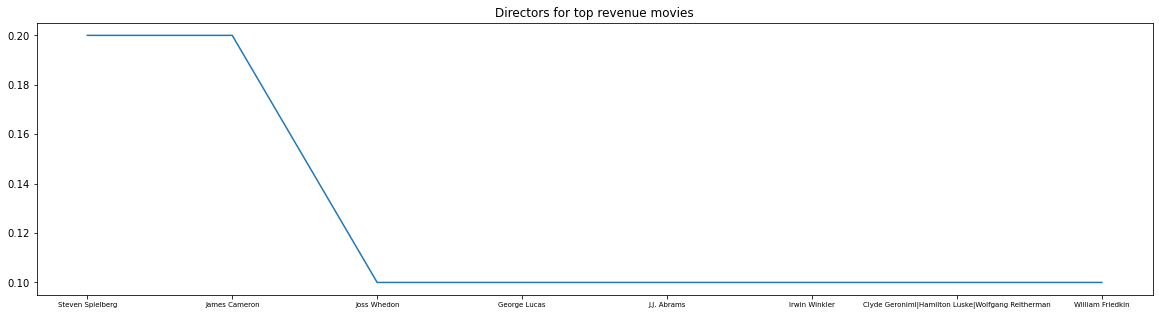

In [20]:
#Plotting the top 10 directors based on revenue
fig = plt.figure(figsize = (20, 5))
top_10_directors_proportions.plot();
plt.xticks(fontsize=7)
plt.title("Directors for top revenue movies");

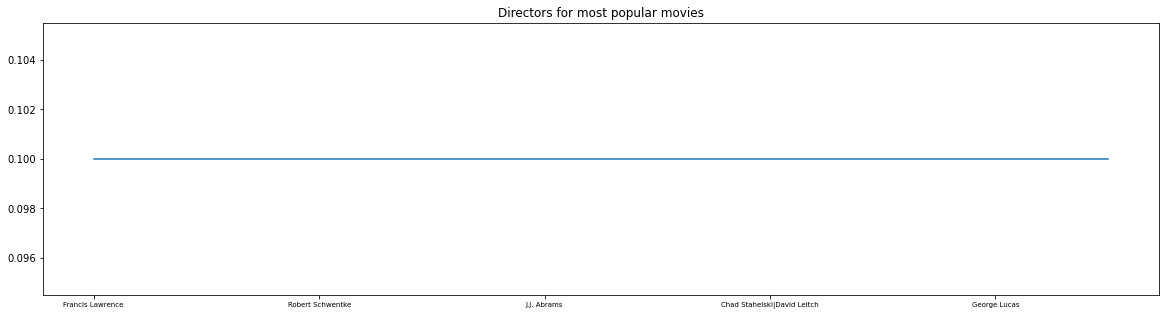

In [21]:
#Plotting the top 10 directors based on popularity
fig = plt.figure(figsize = (20, 5))
top_10_popularity_directors_proportions.plot();
plt.xticks(fontsize=7)
plt.title("Directors for most popular movies");

## <<Two movies directed by two directors - James Cameron and Steven Spielberg, appear among the top selling movies. However, neither of them appear as directors of the most popular movies. The only director that comes up in both lists is George Lucas.>>

## Research Question # 3: Which year had the most movie releases?

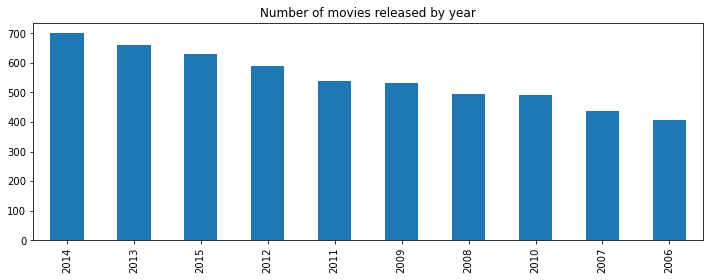

In [14]:
#Plotting a histogram with the number of movies by year
#X axis defines the year and Y axis defines its count
df_sorted['release_year'].value_counts().head(10).plot.bar(figsize=(12,4))
plt.title("Number of movies released by year");

## << Overall, there were more movies released from 2011 onwards than before.>>

## Research Question # 4: Which movies are the most profitable?

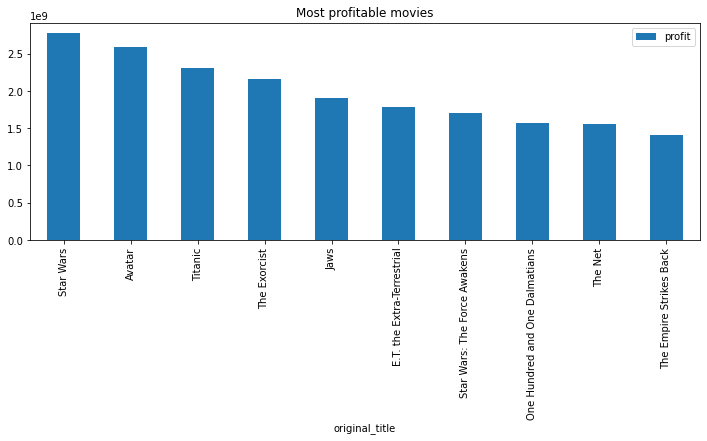

In [13]:
#Calculating profit by substracting budget from revenue and then plotting a histogram with the results
df_sorted['profit'] = df_sorted['revenue_adj'] - df_sorted['budget']
top_profit = df_sorted.nlargest(10,'profit')
top_profit.index = top_profit.original_title
top_profit[['original_title','profit']].plot.bar(figsize=(12,4))
plt.title("Most profitable movies");

## <<Star Wars not only is one of the most popular movies and one of the top selling ones, but also it's the most profitable one.>>

## Research Question # 5: Do any of the directors with the most number of films also appear in the top-selling or most popular movie lists?

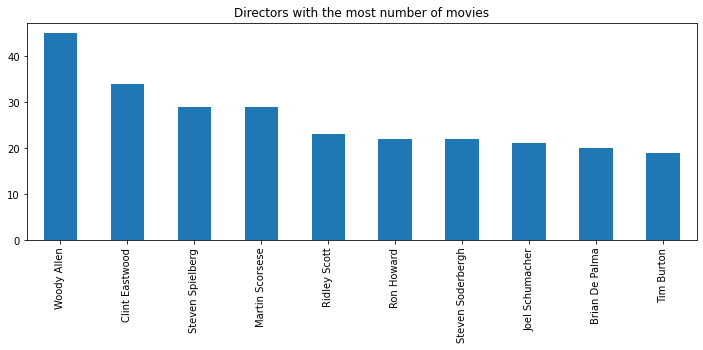

In [12]:
#Plotting a histogram with the directors with the most number of movies
df_sorted['director'].value_counts().head(10).plot.bar(figsize=(12,4))
plt.title("Directors with the most number of movies");

## <<Even though they are not among the directors of the most popular films or the most profitable movies, Woody Allen, Clint Eastwood and Martin Scorsese are the top 3 directors with the most number of movies.>>

## Research Question # 6: Is there a relationship between budget and popularity?

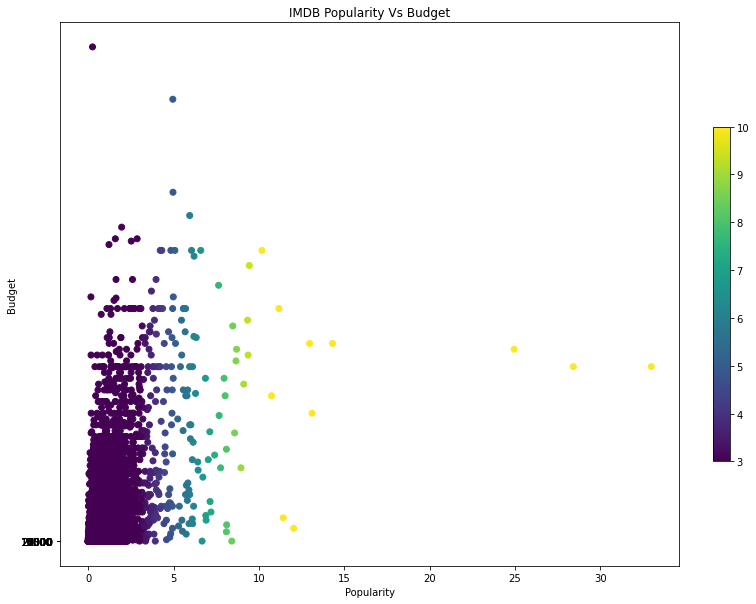

In [32]:
#Plotting a scatterplot that shows the relationship between popularity and budget
#X axis defines popularity and Y axis its budget
plt.figure(figsize=(12,10))
plt.title("IMDB Popularity Vs Budget")
plt.xlabel("Popularity")
plt.ylabel("Budget")
tmp=plt.scatter(df_sorted.popularity,df_sorted.budget,c=df_sorted.popularity,vmin=3,vmax=10)
plt.yticks([i*2500 for i in range(11)])
plt.colorbar(tmp,fraction=.025)
plt.show()

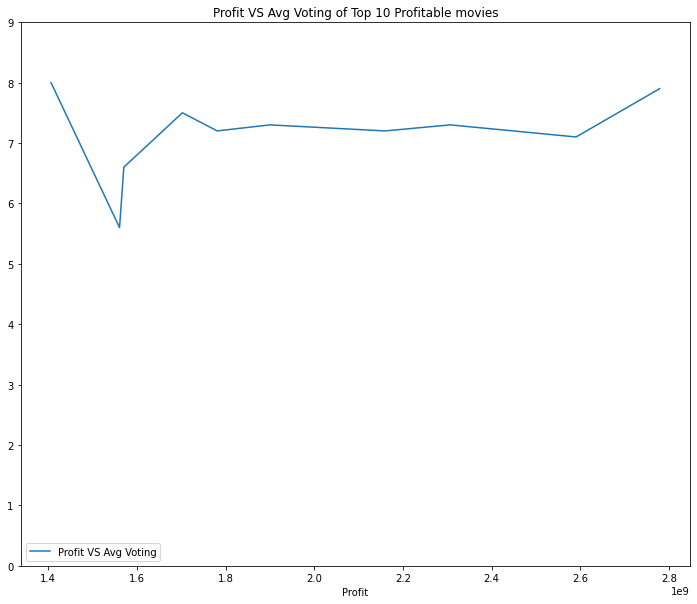

In [33]:
#Plotting a line graph showing the relationship between proft and average voting
    #X axis defines the profit and Y axis defines its average voting
plt.figure(figsize=(12,10))
plt.title("Profit VS Avg Voting of Top 10 Profitable movies")
plt.xlabel('Profit')
plt.plot(top_profit.profit,top_profit.vote_average)
plt.legend(['Profit VS Avg Voting'],loc='lower left')
plt.yticks(range(10))
plt.show()

## <<There seems to be a close relationship between popularity and a film's budget. This makes sense when we think about movies such as Avatar or Titanic or The Avengers, which were blockbusters. >>

## Research Question # 7: Which are the preferred movie genres?

In [35]:
#Loading packages to build dictionaries
from collections import Counter
dicGenresWithCounts = Counter(arrayGenres)

In [34]:
#Building dictionary loop
arrayGenres = []
for i in df_sorted.genres:
    if type(i) == str:
        for x in i.split('|'):
            arrayGenres.append(x)

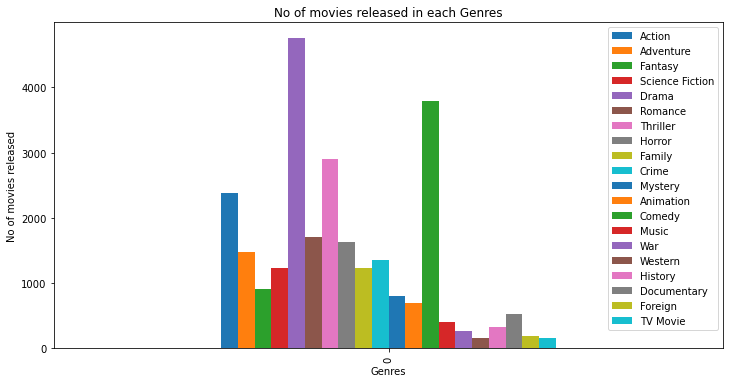

In [36]:
#Plotting number of movies by genre
#X axis defines number of movies released and Y axis defines its genre
df_genres=pd.DataFrame.from_dict([dicGenresWithCounts.values()])
df_genres.columns=list(dicGenresWithCounts.keys())
df_genres.plot.bar(figsize=(12,6))
plt.title("No of movies released in each Genres")
plt.xlabel("Genres")
plt.ylabel("No of movies released");

## <<The top 3 preferred genre in this dataset is Drama, followed by Comedy and then by Thriller. Action movies are on the top 5 but not animation movies, which is curious given the number of animated films nowadays. >>

## Research Question # 8: Who are the actors or actresses that appear the most in this dataset films? 

In [37]:
#Building dictionary loop
arrayCast = []
for i in df_sorted.cast:
    if type(i) == str:
        for x in i.split('|'):
            arrayCast.append(x)

In [38]:
dicCastWithCounts = Counter(arrayCast)

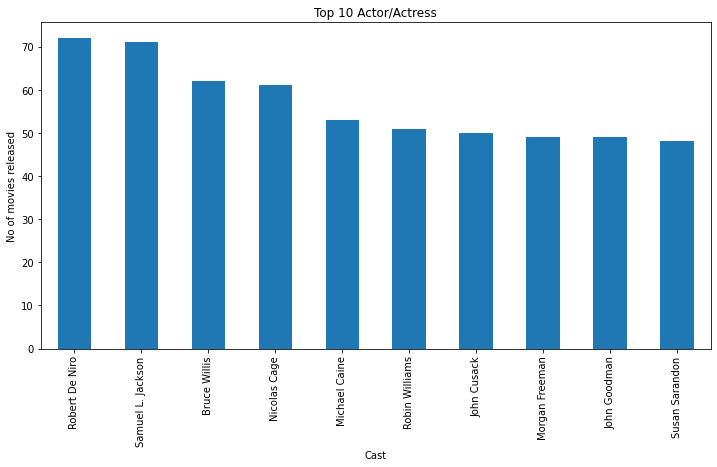

In [39]:
#Plotting top 10 actors/actresses
#X axis defines number of movies released and Y axis defines actors/actresses
df_Cast=pd.DataFrame(data={'Cast':list(dicCastWithCounts.keys()),'Count':list(dicCastWithCounts.values())}).sort_values(by='Count',ascending=False)
df_Cast.index = df_Cast.Cast
df_Cast.Count.head(10).plot.bar(figsize=(12,6))
plt.title("Top 10 Actor/Actress")
plt.xlabel("Cast")
plt.ylabel("No of movies released");

## <<The actors with the most number of movies, aren't part of the cast of the top movies by revenue or popularity. Actors such as Robert De Niro or Robin Williams could be perceived as not great actors, since they are not in the top revenue movies, however, they are some of the most talented actors. >>

<a id='conclusions'></a>
## Conclusions

Based on the analysis performed, some interesting insights came to light. 
1) Popular movies and best-selling movies do not necessarily go hand by hand.

2) There seems to be a relationship between popularity and movies' budget.

3) The number of movies for both actors and directors don't seem to be related to top movies by revenue or popularity. In fact, the actors and directors with the biggest number of movies, aren't involved in the most popular of best-selling movies. 

4) 2011 seems to be an inflexion point in terms of number of movies released. There are more releases from that year onwards than before. 

5) There seems to be a preference for Drama movies, followed by Comedy and Thriller. 

Limitations: while analyzing the data include missing data from several fields. That prevented exploring other questions such as which taglines were the most popular and to which movies were those associated with; same with keywords and lastly, with production companies. 
In addition to this, some of the analysis performed here are based of budget and revenue, which do not have currency unit so it might be possible that different movies have a budget in a different currency depending on the country they were produced.